# CDM Research Report

## Problem Statement

## Exploratory Data Analysis

In [2]:
#Import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
# Load data
dt = pd.read_excel('/Users/riva5/Downloads/update_CDM_projects_basic_information.xlsx')
df = dt.copy()

## Project classification

In [4]:
df['Project classification'].value_counts(normalize=True)

LARGE    0.553995
SMALL    0.446005
Name: Project classification, dtype: float64

Text(0.5, 1.0, 'The number of large-scale and small-scale projects')

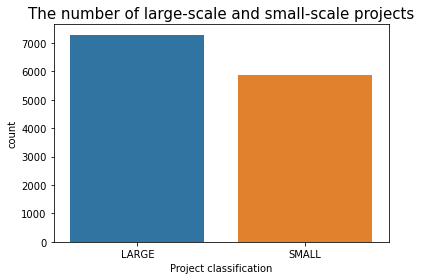

In [230]:
sns.countplot(df['Project classification'])
plt.title("The number of large-scale and small-scale projects", fontsize = 15)

## Sectoral scope number(s)

In [120]:
df['Scope'].value_counts(normalize=True)

1               0.689854
13              0.066525
1; 13           0.049362
1; 4            0.041692
4               0.032351
3               0.024453
3; 4            0.012910
10; 8           0.011543
5               0.011012
14              0.008278
13; 15          0.007063
1; 15           0.006911
10              0.006151
1; 13; 15       0.005544
7               0.004708
15              0.004405
10; 13          0.003114
1; 3            0.001974
11              0.001823
1; 10; 8        0.001823
1; 5            0.001443
9               0.001291
2               0.001139
1; 3; 4         0.000911
1; 11           0.000608
10; 5           0.000456
11; 4           0.000380
11; 4; 9        0.000228
1; 2            0.000152
1; 14           0.000152
8               0.000152
13; 5           0.000152
13; 7           0.000152
1; 3; 5         0.000152
8; 10           0.000152
1; 13; 5        0.000152
1; 7            0.000076
1; 13; 3; 4     0.000076
1; 10; 13       0.000076
1; 4; 13        0.000076


In [231]:
df['Scope'].value_counts()

1               9084
13               876
1; 13            650
1; 4             549
4                426
3                322
3; 4             170
10; 8            152
5                145
14               109
13; 15            93
1; 15             91
10                81
1; 13; 15         73
7                 62
15                58
10; 13            41
1; 3              26
11                24
1; 10; 8          24
1; 5              19
9                 17
2                 15
1; 3; 4           12
1; 11              8
10; 5              6
11; 4              5
11; 4; 9           3
1; 2               2
1; 14              2
8                  2
13; 5              2
13; 7              2
1; 3; 5            2
8; 10              2
1; 13; 5           2
1; 7               1
1; 13; 3; 4        1
1; 10; 13          1
1; 4; 13           1
1; 9               1
4; 9               1
10; 3              1
13; 4              1
1; 8               1
11; 3              1
1; 13; 15; 4       1
Name: Scope, 

## Methodologies used at registration



In [131]:
df['Methodologies'].value_counts(normalize=True)

ACM    0.478281
AMS    0.439930
AM     0.072372
AR-    0.009417
Name: Methodologies, dtype: float64

Text(0.5, 1.0, 'The number of different methodologies')

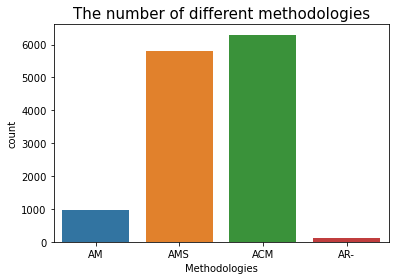

In [234]:
# count each methodologies

sns.countplot(df['Methodologies'])
plt.title("The number of different methodologies", fontsize = 15)

Text(0.5, 1.0, 'The counts of different types of crediting periods by each methodology')

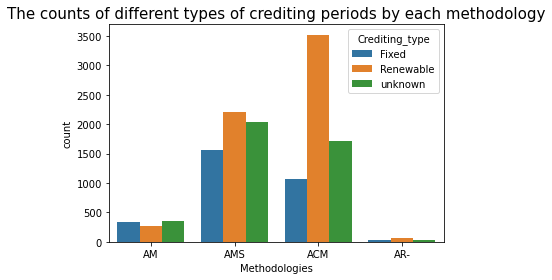

In [9]:
# The counts of different types of crediting period by each methodologies

sns.countplot(df['Methodologies'], hue=df['Crediting_type'])
plt.title("The counts of different types of crediting periods by each methodology", fontsize = 15)

In [114]:
# the mean reductions by each methodologies

df['Reductions'].groupby(df['Methodologies']).mean()

Methodologies
ACM    206533.183074
AM     470012.672613
AMS     41655.503021
AR-    810610.709677
Name: Reductions, dtype: float64

## Registration project title

In [139]:
df['Registration project title'].head()

0    Project for GHG emission reduction by thermal ...
1                   HFC Decomposition Project in Ulsan
2      Brazil NovaGerar Landfill Gas to Energy Project
3                   La Esperanza Hydroelectric Project
4    Project for GHG Emission Reduction by Thermal ...
Name: Registration project title, dtype: object

In [141]:
df['Registration project title'] = df['Registration project title'].apply(lambda x: x.split('_')[0]).apply(lambda x: x.split()[0])
df['Registration project title'].value_counts()

Sichuan     277
Yunnan      236
Wind        236
Methane     208
Inner       200
           ... 
Fiji          1
Binglang      1
100-MW        1
Hengyuan      1
WHRB          1
Name: Registration project title, Length: 4117, dtype: int64

## Project type (UNEP DTU)

In [153]:
df['Project_type'].value_counts(normalize=True)

Wind                     0.237773
Hydro                    0.230331
Biomass Energy           0.114976
Methane avoidance        0.091358
EE own generation        0.063867
Landfill gas             0.049438
Solar                    0.048375
EE Industry              0.025972
EE households            0.020732
Fossil fuel switch       0.019593
EE supply side           0.016176
Coal bed/mine methane    0.013897
N2O                      0.010100
Fugitive                 0.009037
EE service               0.008733
Cement                   0.007442
Reforestation            0.007290
Transport                0.005696
Geothermal               0.003341
Mixed renewables         0.003265
Energy distribution      0.003114
Hybrid renewables        0.002050
HFCs                     0.002050
PFCs and SF6             0.001899
Afforestation            0.001823
Agriculture              0.000759
CO2 usage                0.000456
Tidal                    0.000152
Waste                    0.000152
Biogas        

In [157]:
# Mean reductions by each type of project 

df['Reductions'].groupby(df['Project_type']).mean().div(1000).sort_values(ascending=False)

Project_type
Solar & wind             3901.937000
HFCs                     3789.415222
Tidal                    1096.393000
Reforestation            1033.315323
N2O                       792.482496
Coal bed/mine methane     649.583585
Fugitive                  578.005336
EE supply side            420.754761
Mixed renewables          391.068326
Fossil fuel switch        386.663116
Geothermal                386.145273
PFCs and SF6              297.841600
Energy distribution       282.077902
EE households             277.358073
Hybrid renewables         215.570000
Landfill gas              177.465694
Hydro                     151.571948
Cement                    142.688847
EE own generation         127.046312
Transport                 110.477293
Wind                      110.096388
EE service                 81.721965
Biomass Energy             67.052888
Methane avoidance          55.930042
Afforestation              54.893875
Solar                      41.632595
EE Industry              

## Registered or rejected (year)

In [203]:
df['Registered or rejected'].value_counts(normalize=True)

0       0.350471
2012    0.261923
2011    0.087257
2010    0.065538
2009    0.057488
2008    0.036528
2007    0.035996
2006    0.031820
2013    0.028706
2014    0.014657
2015    0.007746
2016    0.005240
2005    0.004860
2020    0.003873
2017    0.003493
2019    0.002582
2018    0.001671
2021    0.000076
2004    0.000076
Name: Registered or rejected, dtype: float64

In [236]:
df['Registered or rejected'].value_counts()

0       4615
2012    3449
2011    1149
2010     863
2009     757
2008     481
2007     474
2006     419
2013     378
2014     193
2015     102
2016      69
2005      64
2020      51
2017      46
2019      34
2018      22
2021       1
2004       1
Name: Registered or rejected, dtype: int64

In [158]:
df['Reductions'].groupby(df['Registered or rejected']).mean().div(1000).sort_values(ascending=False)

Registered or rejected
2018    1550.512091
2004    1138.698000
2005     757.957641
2021     730.788000
2019     353.766559
2007     264.822030
2006     242.379969
2016     198.290406
2020     192.691843
2009     158.370048
2008     158.018549
2010     151.528892
0        151.343555
2015     145.976471
2013     141.454971
2011     140.565520
2014     134.261461
2012     132.855308
2017      92.849435
Name: Reductions, dtype: float64

## Website project status

In [178]:
df['Status'].value_counts(normalize=True)

Registered                      0.623329
Validation Terminated           0.233976
Validation Replaced             0.063032
Validation Public               0.035996
Rejected                        0.021567
Pending Publication             0.013214
Withdrawn                       0.005012
Provisional                     0.002050
Deregistered                    0.001595
Withdrawn Before Publication    0.000152
Requesting Registration         0.000076
Name: Status, dtype: float64

In [179]:
df['Status'].value_counts()

Registered                      8208
Validation Terminated           3081
Validation Replaced              830
Validation Public                474
Rejected                         284
Pending Publication              174
Withdrawn                         66
Provisional                       27
Deregistered                      21
Withdrawn Before Publication       2
Requesting Registration            1
Name: Status, dtype: int64

Text(0.5, 1.0, 'The number of different types of website project status')

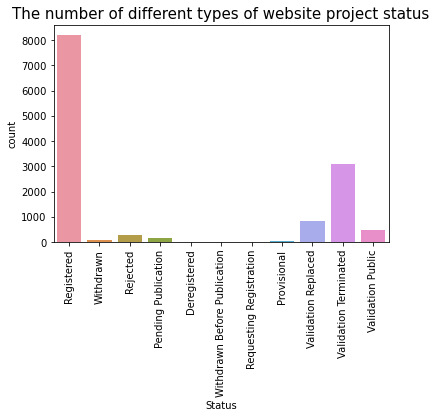

In [174]:
sns.countplot(df['Status'])
plt.xticks(rotation=90)
plt.title("The number of different types of website project status", fontsize = 15)

In [176]:
# Mean reductions by different status

df['Reductions'].groupby(df['Status']).mean().sort_values(ascending=False)

Status
Validation Public               319945.552743
Pending Publication             212812.649425
Deregistered                    204162.095238
Registered                      163762.417641
Rejected                        137590.073944
Validation Terminated           130185.604349
Validation Replaced             123639.156627
Withdrawn                       122828.803030
Provisional                      88497.074074
Requesting Registration          67150.000000
Withdrawn Before Publication         0.000000
Name: Reductions, dtype: float64

## Type of crediting period

In [180]:
df['Crediting_type'].value_counts(normalize=True)

Renewable    0.459751
unknown      0.314323
Fixed        0.225926
Name: Crediting_type, dtype: float64

In [181]:
df['Crediting_type'].value_counts()

Renewable    6054
unknown      4139
Fixed        2975
Name: Crediting_type, dtype: int64

Text(0.5, 1.0, 'The number of different types of crediting period')

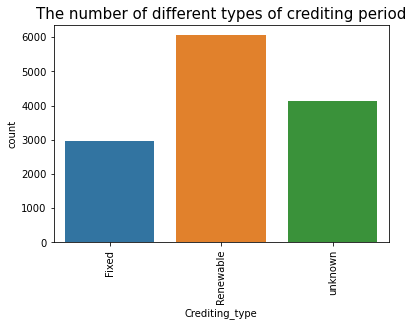

In [183]:
sns.countplot(df['Crediting_type'])
plt.xticks(rotation=90)
plt.title("The number of different types of crediting period", fontsize = 15)

In [184]:
# The outcome might be caused by the percentage of the different crediting types.

df['Reductions'].groupby(df['Crediting_type']).mean().sort_values(ascending=False)

Crediting_type
Renewable    195566.660555
unknown      134130.842716
Fixed        118106.218487
Name: Reductions, dtype: float64

## Total reductions

In [191]:
pd.qcut(df['Reductions'],6).value_counts()

(-0.001, 14979.0]         2195
(14979.0, 30646.0]        2195
(52124.0, 93898.0]        2195
(180601.5, 47808900.0]    2195
(30646.0, 52124.0]        2194
(93898.0, 180601.5]       2194
Name: Reductions, dtype: int64

In [240]:
pd.qcut(df['Reductions'],5).value_counts(normalize=True)

(-0.001, 17888.0]         0.200106
(38005.8, 75390.0]        0.200030
(150895.2, 47808900.0]    0.200030
(75390.0, 150895.2]       0.199954
(17888.0, 38005.8]        0.199878
Name: Reductions, dtype: float64

In [193]:
pd.crosstab(pd.qcut(df['Reductions'], 10), columns=df['Methodologies'])

Methodologies,ACM,AM,AMS,AR-
Reductions,,,,
"(-0.001, 9243.0]",74,23,1166,55
"(9243.0, 17888.0]",89,42,1176,10
"(17888.0, 27192.2]",176,54,1075,11
"(27192.2, 38005.8]",337,46,924,9
"(38005.8, 52124.0]",479,64,766,8
"(52124.0, 75390.0]",755,111,444,7
"(75390.0, 101994.8]",1121,98,91,6
"(101994.8, 150895.2]",1137,114,62,4
"(150895.2, 269741.6]",1160,124,27,6


In [209]:
pd.crosstab(pd.qcut(df['Reductions'], 10), columns=df['Registered or rejected'])

Registered or rejected,0,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Reductions,,,,,,,,,,,,,,,,,,,
"(-0.001, 9243.0]",568,0,3,59,59,32,54,45,79,263,63,35,23,12,7,1,1,14,0
"(9243.0, 17888.0]",551,0,4,55,53,34,57,66,90,280,43,34,21,8,6,3,7,5,0
"(17888.0, 27192.2]",533,0,9,47,52,42,70,86,112,268,37,19,14,10,6,2,7,2,0
"(27192.2, 38005.8]",520,0,6,29,47,52,67,94,114,317,29,18,6,5,7,1,4,0,0
"(38005.8, 52124.0]",535,0,9,49,44,57,76,68,102,294,40,20,10,7,3,1,1,1,0
"(52124.0, 75390.0]",487,0,6,40,51,60,104,81,114,299,43,12,7,4,4,1,3,1,0
"(75390.0, 101994.8]",327,0,7,29,25,36,55,61,128,577,30,18,2,5,5,4,0,7,0
"(101994.8, 150895.2]",356,0,6,23,25,43,95,127,170,415,28,11,4,3,3,0,1,7,0
"(150895.2, 269741.6]",326,0,5,35,54,62,85,136,126,434,24,11,4,6,0,4,1,4,0


In [5]:
pd.crosstab(pd.qcut(df['Reductions'], 10), columns=df['First_crediting'])

First_crediting,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Reductions,,,,,,,,,,,,,,,,,,,,,
"(-0.001, 9243.0]",7,27,8,11,22,14,39,130,112,101,...,26,20,9,2,20,55,5,8,0,0
"(9243.0, 17888.0]",3,10,15,20,22,11,48,119,137,129,...,29,25,7,7,6,14,2,2,0,0
"(17888.0, 27192.2]",1,12,10,18,14,19,38,107,138,148,...,27,21,8,6,11,3,3,0,0,0
"(27192.2, 38005.8]",2,7,8,11,11,12,28,88,157,159,...,17,6,11,3,4,2,3,1,0,0
"(38005.8, 52124.0]",2,6,6,15,3,21,34,97,165,144,...,32,13,8,4,5,1,4,0,0,0
"(52124.0, 75390.0]",3,4,7,8,12,13,29,80,165,183,...,26,9,7,4,7,1,3,0,0,1
"(75390.0, 101994.8]",3,2,2,3,7,12,26,59,102,97,...,23,13,9,6,3,7,0,0,0,0
"(101994.8, 150895.2]",0,3,2,5,8,12,18,52,111,149,...,19,11,7,2,5,6,7,0,1,0
"(150895.2, 269741.6]",1,4,8,3,5,10,22,81,133,119,...,28,25,11,4,4,4,6,0,0,0


In [223]:
pd.crosstab(pd.qcut(df['Reductions'], 10), columns=df['End_first'])

End_first,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,...,2034,2035,2036,2037,2038,2039,2041,2044,2045,2047
Reductions,,,,,,,,,,,,,,,,,,,,,
"(-0.001, 9243.0]",3,4,3,16,17,15,25,44,34,74,...,1,0,2,2,3,1,1,0,0,1
"(9243.0, 17888.0]",0,4,7,15,10,15,23,47,38,107,...,0,0,1,0,1,0,0,0,0,0
"(17888.0, 27192.2]",1,8,5,7,6,11,30,56,59,100,...,0,1,2,1,0,1,1,0,0,0
"(27192.2, 38005.8]",0,3,4,9,10,6,16,46,93,117,...,0,0,2,1,1,0,0,1,1,0
"(38005.8, 52124.0]",1,4,5,8,6,15,27,59,78,111,...,0,0,1,0,1,0,1,0,0,0
"(52124.0, 75390.0]",0,2,3,7,7,13,18,47,85,129,...,0,0,0,0,1,0,0,0,0,0
"(75390.0, 101994.8]",1,2,1,4,2,6,12,36,54,79,...,0,0,0,0,0,0,1,0,0,0
"(101994.8, 150895.2]",1,2,2,2,5,3,9,42,62,119,...,0,0,0,0,0,2,0,0,0,0
"(150895.2, 269741.6]",2,2,6,2,4,9,20,61,75,107,...,0,0,0,0,0,0,0,0,0,0


## Start of first crediting period

In [210]:
df['First_crediting'].value_counts(normalize=True)

2012    0.209447
2013    0.128114
2011    0.112546
2009    0.102901
2008    0.102825
2010    0.096598
2007    0.069183
2014    0.047691
2006    0.024529
2015    0.022099
2016    0.014277
2005    0.010252
2004    0.008733
2020    0.008430
2003    0.007898
2017    0.007366
2019    0.006151
2001    0.005923
2002    0.005164
2018    0.004025
2021    0.002734
2000    0.001823
2022    0.001063
2023    0.000152
2024    0.000076
Name: First_crediting, dtype: float64

In [211]:
df['First_crediting'].value_counts()

2012    2758
2013    1687
2011    1482
2009    1355
2008    1354
2010    1272
2007     911
2014     628
2006     323
2015     291
2016     188
2005     135
2004     115
2020     111
2003     104
2017      97
2019      81
2001      78
2002      68
2018      53
2021      36
2000      24
2022      14
2023       2
2024       1
Name: First_crediting, dtype: int64

In [216]:
pd.qcut(df['First_crediting'],5).value_counts()

(2010.0, 2012.0]      4240
(1999.999, 2008.0]    3112
(2008.0, 2010.0]      2627
(2012.0, 2013.0]      1687
(2013.0, 2024.0]      1502
Name: First_crediting, dtype: int64

## End of first crediting period

In [212]:
df['End_first'].value_counts(normalize=True)

2019    0.204283
2018    0.110875
2020    0.105863
2017    0.102142
2022    0.093180
2016    0.079815
2021    0.072296
2015    0.049590
2014    0.039414
2023    0.038502
2024    0.018530
2013    0.016783
2025    0.010708
2027    0.010632
2026    0.009721
2012    0.008050
2011    0.005696
2010    0.005544
2028    0.003341
2009    0.002962
2031    0.002354
2008    0.002354
2029    0.001974
2030    0.001671
2007    0.000759
2036    0.000608
2038    0.000532
2037    0.000304
2041    0.000304
2033    0.000304
2039    0.000304
2044    0.000152
2032    0.000152
2045    0.000076
2035    0.000076
2034    0.000076
2047    0.000076
Name: End_first, dtype: float64

In [213]:
df['End_first'].value_counts()

2019    2690
2018    1460
2020    1394
2017    1345
2022    1227
2016    1051
2021     952
2015     653
2014     519
2023     507
2024     244
2013     221
2025     141
2027     140
2026     128
2012     106
2011      75
2010      73
2028      44
2009      39
2031      31
2008      31
2029      26
2030      22
2007      10
2036       8
2038       7
2037       4
2041       4
2033       4
2039       4
2044       2
2032       2
2045       1
2035       1
2034       1
2047       1
Name: End_first, dtype: int64

In [217]:
pd.qcut(df['End_first'],5).value_counts()

(2016.0, 2018.0]      2805
(2006.999, 2016.0]    2778
(2018.0, 2019.0]      2690
(2021.0, 2047.0]      2549
(2019.0, 2021.0]      2346
Name: End_first, dtype: int64

## List of host countries

In [224]:
df['Countries'].value_counts(normalize=True)

CN                                                                                                        0.384113
IN                                                                                                        0.258581
BR                                                                                                        0.057943
VN                                                                                                        0.025213
MX                                                                                                        0.024985
                                                                                                            ...   
BJ; ML                                                                                                    0.000076
GH; MW; NG; SN; ZM; ZW                                                                                    0.000076
AO; BF; BJ; CI; CM; CV; DZ; EG; GA; GN; GW; LR; LY; MA; MG; ML; MR; MW; MZ; NA; 

In [225]:
df['Countries'].value_counts()

CN                                                                                                        5058
IN                                                                                                        3405
BR                                                                                                         763
VN                                                                                                         332
MX                                                                                                         329
                                                                                                          ... 
BJ; ML                                                                                                       1
GH; MW; NG; SN; ZM; ZW                                                                                       1
AO; BF; BJ; CI; CM; CV; DZ; EG; GA; GN; GW; LR; LY; MA; MG; ML; MR; MW; MZ; NA; NE; NG; SL; SN; TD; TN       1
N

## Count Plot - Methodologies used at registration

Text(0.5, 1.0, 'The number of Methodologies used at registration')

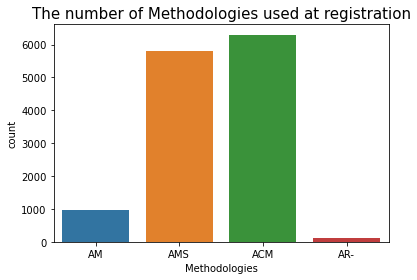

In [101]:
sns.countplot(df['Methodologies'])
plt.title("The number of Methodologies used at registration", fontsize = 15)

## Count Plot - Project type (UNEP DTU)

Text(0.5, 1.0, 'The number of each project type')

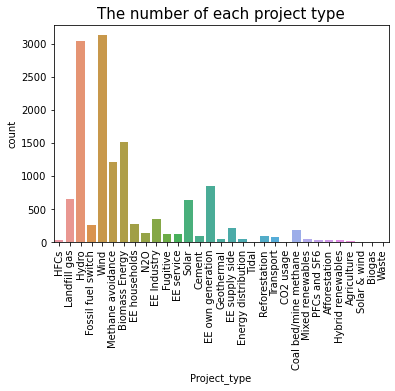

In [103]:
sns.countplot(df['Project_type'])
plt.xticks(rotation=90)
plt.title("The number of each project type", fontsize = 15)

## Bar Plot

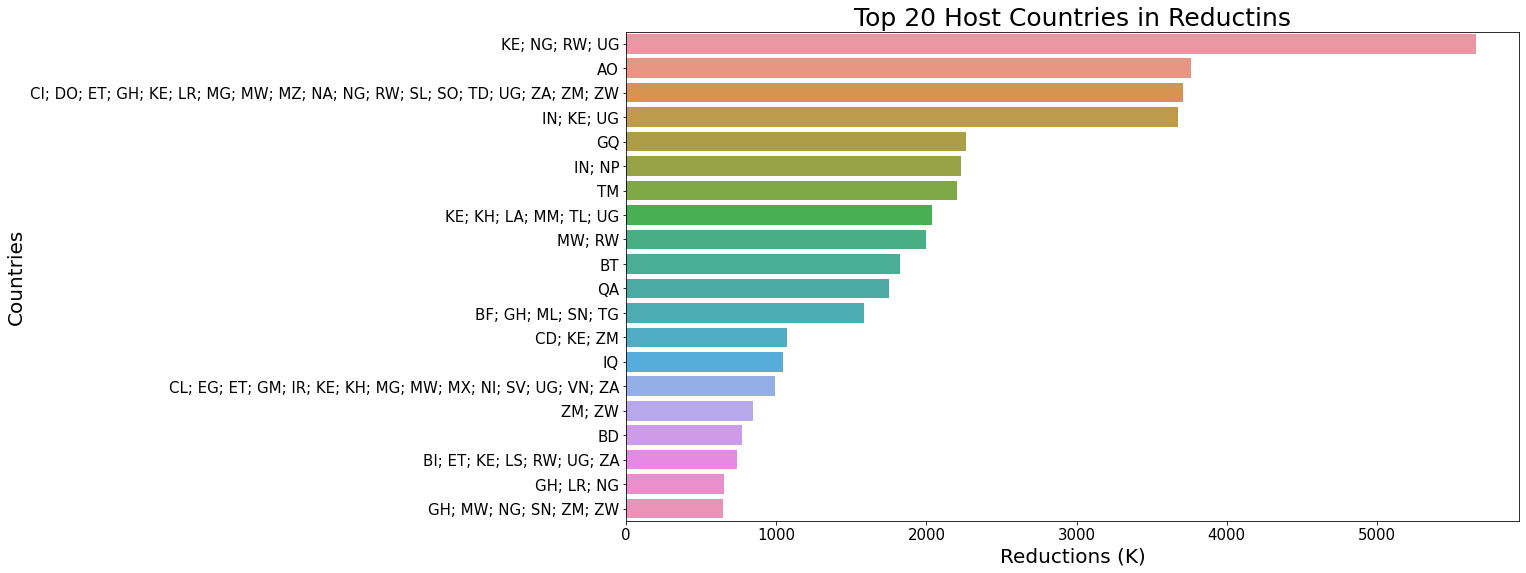

In [8]:
# Country vs reductions

## Top 10 Host Countries in Reductins

country_reduction_avg = df.groupby(by = ['Countries'])['Reductions'].mean().div(1000).reset_index()
table = country_reduction_avg.sort_values(by = 'Reductions', ascending = False).head(20)
plt.figure(figsize = (16, 9))
sns.barplot(y = table['Countries'], x = table['Reductions'])

plt.title("Top 20 Host Countries in Reductins", fontsize = 25)
plt.xlabel("Reductions (K)", fontsize = 20)
plt.ylabel("Countries", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

## Pie plot: Percentage of Reductions by  Methodologies

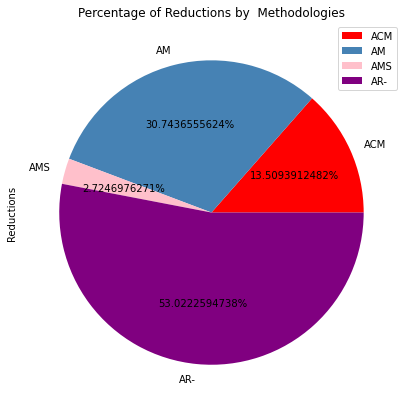

In [76]:
df1=pd.pivot_table(df, index = 'Methodologies', values="Reductions")

plot = df1.plot.pie(y='Reductions', figsize=(7,7),autopct='%1.10f%%',
                    colors = ['red','steelblue','pink','purple'],
                    title='Percentage of Reductions by  Methodologies')